/Users/mo2016/Documents/modelling/6eq/modules/numerical_solvers_variableboundary.py:590: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k * (x - x0))) + b
  5%|▌         | 249/4799 [00:00<00:01, 2486.84it/s]

parID = 40
{'ba': 0.01, 'bb': 0.01, 'bc': 0.01, 'bd': 0.01, 'be': 0.01, 'bf': 0.01, 'Va': 222.4564596863067, 'Vb': 32.57026004882567, 'Vc': 116.44107906536578, 'Vd': 630.2334672515394, 'Ve': 23.53522572921876, 'Vf': 17.956323213719198, 'kaa': 0.11403476776832755, 'kda': 2.1323305379103967, 'keb': 196.5483390074794, 'kbd': 2.1954223511212367, 'kce': 10000.0, 'kfe': 0.17403560136666524, 'kee': 70.78204947078233, 'mua': 4.499216191367029, 'mulva': 0.38894631678933245, 'd_B': 3.8681258919916974, 'd_A': 1.0, 'n': 2.0, 'ss_n': 1.0, 'ss_list': array([3.177e-02, 5.235e-01, 2.046e-01, 8.721e+01, 2.571e-02, 2.510e+00]), 'class': 'Stable with diffusion', 'maxeig': (-0.3889451606965111+0j), 'oscillations': 1.0, 'k0_eig': array([-7.234+0.000e+00j, -1.077+2.646e+00j, -1.077-2.646e+00j,
       -0.389+0.000e+00j, -0.389+4.132e-13j, -0.389-4.132e-13j])}


100%|██████████| 4799/4799 [00:01<00:00, 3048.79it/s]


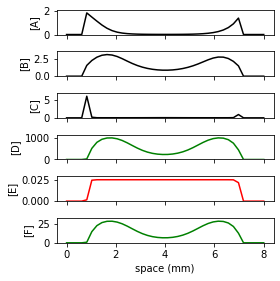

In [1]:
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'
import sys
sys.path.append(modulepath)
modelling_hpc = '/Volumes/mo2016/home/Documents/modelling'

while True:
    try:
        from numerical_solvers_variableboundary import *
        break
    except ImportError:
        modelling_hpc = '/rds/general/user/mo2016/home/Documents/modelling'
        modulepath = modelling_hpc + '/6eq/modules'
        sys.path.append(modulepath)

from numerical_solvers_variableboundary import *

#execution parameters
circuit_n=2
variant=0
parametersets_n = 1000
save_figure = False
tqdm_disable = False #disable tqdm
dimension = '1D'

# open parameter dictionaries
general_df = pickle.load(open(modelling_hpc + '/6eq/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit_n,variant,parametersets_n), "rb"))
# general_df = general_df.iloc[:1]

#chose parameter sets to analyse
parID = 40
if parID == 'all':
    interesting_list = np.unique(general_df.index.get_level_values(0))
else:
    interesting_list = [int(parID)]

for parID in interesting_list:
    print('parID = ' + str(parID))
    mechanism = 'general'
    boundary_coef = 1 #1 is open boundary and 0 is closed boundary
    shape = 'growing_colony'

    x_gridpoints = 5
    T =100
    par_dict = general_df.loc[(parID,0)].to_dict()
    print(par_dict)
    L=8
    J = L *x_gridpoints  # number of equally spaced gridpoints in space domain (larger J means more spatial precision(tends towards continuum solution) )
    t_gridpoints = t_gridpoints_stability(L, J, T)  # number of equally spaced gridpoints in domain (larger N means more temporal precision (tends towards continuum solution) )

    N = T * t_gridpoints
    initial_condition = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

    filename = 'circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)

    if dimension == '1D':
        records, final_concentration, grids = crank_nicolson(par_dict, initial_condition, L, J, T, N, circuit_n,boundary_coef=boundary_coef,tqdm_disable=tqdm_disable)
        if save_figure ==True:
            pickle.dump(final_concentration, open('../../results/simulation/1Dfinal_%s.pkl'%filename, 'wb'))

        plot_1D_final_concentration(final_concentration, grids,mechanism,shape,filename,parID,save_figure=save_figure,path=modelling_hpc)

    if dimension == '2D':
     # Define 2D numerical parameters
        L_x = L
        L_y = L
        I = J

        # Run 2D simulation
        try:
            records,final_concentration,grids = adi_shape(par_dict,initial_condition,L_x,L_y,J,I,T,N, circuit_n,shape, boundary_coef=boundary_coef,tqdm_disable=tqdm_disable)#,tqdm_disable=tqdm_disable)
            plot_redgreen_contrast(final_concentration,x_gridpoints)
            plt.ylabel('y axis (mm)', size=16)
            plt.xlabel('x axis (mm)', size=16)
            plt.yticks(size=15)
            plt.xticks(size=15)
            if save_figure ==True:
                plt.savefig(modelling_hpc + '/6eq/numerical_confocal/results/figures/redgreen/%s/%s/redgreen_%s.png' % (mechanism,shape,filename))
                pickle.dump(final_concentration, open('../../results/simulation/2Dfinal_%s.pkl'%filename, 'wb'))
                plt.show()
            else:
                plt.show()

        except ValueError:
            print('!!!!!!!!!!!!!')
            print('ValueError --> unstable solution')
            print('!!!!!!!!!!!!!')
            print()

            pass


In [10]:
final_concentration

[array([0.   , 0.   , 0.   , 0.   , 1.846, 1.491, 1.143, 0.811, 0.534,
        0.333, 0.203, 0.124, 0.077, 0.05 , 0.033, 0.023, 0.017, 0.013,
        0.011, 0.011, 0.011, 0.011, 0.013, 0.017, 0.023, 0.032, 0.048,
        0.071, 0.108, 0.165, 0.252, 0.387, 0.594, 0.913, 1.405, 0.   ,
        0.   , 0.   , 0.   , 0.   ]),
 array([0.   , 0.   , 0.   , 0.   , 1.574, 2.292, 2.774, 3.057, 3.156,
        3.088, 2.876, 2.559, 2.199, 1.855, 1.558, 1.319, 1.136, 1.005,
        0.92 , 0.878, 0.877, 0.916, 0.996, 1.121, 1.292, 1.514, 1.783,
        2.086, 2.392, 2.648, 2.793, 2.781, 2.58 , 2.162, 1.502, 0.   ,
        0.   , 0.   , 0.   , 0.   ]),
 array([0.   , 0.   , 0.   , 0.   , 5.957, 0.173, 0.033, 0.028, 0.027,
        0.027, 0.027, 0.027, 0.028, 0.029, 0.03 , 0.033, 0.036, 0.041,
        0.045, 0.047, 0.047, 0.043, 0.039, 0.035, 0.032, 0.03 , 0.028,
        0.028, 0.027, 0.027, 0.027, 0.027, 0.028, 0.054, 0.911, 0.   ,
        0.   , 0.   , 0.   , 0.   ]),
 array([   0.   ,    0.   ,    0. 

In [2]:

def plot_redgreen_contrast(final_concentration, mm,mechanism,shape,filename,path,dimension='1D', scale_factor=10,save_figure=False,):
    green = final_concentration[5]
    red = final_concentration[4]

    x_grid = np.linspace(0,mm,len(green))
    
    if dimension == '1D':
        normalised_red = list_rgb_normalisation(red)
        normalised_green = list_rgb_normalisation(green)
        plt.plot(x_grid, normalised_red, 'r', label='E')
        plt.plot(x_grid, normalised_green, 'g', label='D')
        plt.legend()

    elif dimension == '2D':
        normalised_red = matrix_rgb_normalisation(red)
        normalised_green = matrix_rgb_normalisation(green)
        zeros = np.zeros(normalised_green.shape)
        rgb = np.dstack((normalised_red, normalised_green, zeros))
        rgb = np.rot90(rgb)
        plt.imshow(rgb.astype('uint8'), origin='lower')
        tick_positions = np.arange(0, len(normalised_green), len(normalised_green) / 4)
        tick_labels = np.arange(0, len(normalised_green) / scale_factor,
                                len(normalised_green) / scale_factor / 4).round(decimals=2)
        plt.xticks(tick_positions, tick_labels)
        plt.yticks(tick_positions, tick_labels)
        plt.ylabel('y axis (mm)', size=16)
        plt.xlabel('x axis (mm)', size=16)
        plt.yticks(size=15)
        plt.xticks(size=15)

    if save_figure == True:
        plt.savefig(path + '/6eq/numerical_confocal/results/figures/%s/%s/%s/%s_%s.jpeg' % (dimension,mechanism, shape, dimension,filename))
        plt.close()
    else:
        plt.show()

    return normalised_red, normalised_green

In [3]:
import pickle 
modelling_hpc = '/Volumes/mo2016/home/Documents/modelling'
for parID in range(494,1001):
    print(parID)
    filename = 'circuit2_variant0_boundary1_growing_colony_generalID%r_L8_J40_T100_N4800'%parID

    try:
        final_concentration = pickle.load( open(modelling_hpc +  "/6eq/numerical_confocal/results/simulation/2Dfinal_%s.pkl"%filename, "rb" ) )
        red,green= plot_redgreen_contrast(final_concentration,8,'general','growing_colony',filename,modelling_hpc,dimension='2D',save_figure=True)
    except FileNotFoundError:
        print('parID not found')
        pass


494
495
496
497
parID not found
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
parID not found
513
514
515
516
517
518
519
520
521
parID not found
522
523
524
525
526
527
528
529
530
531
parID not found
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
parID not found
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
parID not found
613
parID not found
614
615
616
617
618
parID not found
619
620
621
622
parID not found
623
624
625
parID not found
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
parID not found
641
642
643
644
645
646
647
648
parID not found
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
parID not found
666
667
parID not found
668
669
670
671
672
673
674
675
parID not found
676
677
678
679
680
681
parID no

In [5]:
general_df = pickle.load(open(modelling_hpc + '/6eq/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit_n,variant,parametersets_n), "rb"))

general_df

ba    bb    bc    bd    be    bf          Va          Vb  \
1    0  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
     1  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
     2  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
2    0  0.01  0.01  0.01  0.01  0.01  0.01   81.676624   58.969575   
     1  0.01  0.01  0.01  0.01  0.01  0.01   81.676624   58.969575   
...      ...   ...   ...   ...   ...   ...         ...         ...   
996  2  0.01  0.01  0.01  0.01  0.01  0.01   80.468147  298.366942   
997  0  0.01  0.01  0.01  0.01  0.01  0.01  142.631908  443.167734   
998  0  0.01  0.01  0.01  0.01  0.01  0.01  340.088558   73.408547   
999  0  0.01  0.01  0.01  0.01  0.01  0.01  734.741695  106.452477   
1000 0  0.01  0.01  0.01  0.01  0.01  0.01  107.271583   24.413536   

                Vc          Vd  ...      mulva       d_B  d_A    n  ss_n  \
1    0   53.098595  280.177354  ...   0.295752  0.023792  1.0  2.0   3.0   
     1   53.098595  280.177354  ...   0.295752  0.023792  1.0  2.0   3.0   
     2   53.098595  280.177354  ...   0.295752  0.023792  1.0  2.0   3.0   
2    0  494.302517  119.481025  ...   0.166003  0.002301  1.0  2.0   3.0   
     1  494.302517  119.481025  ...   0.166003  0.002301  1.0  2.0   3.0   
...            ...         ...  ...        ...       ...  ...  ...   ...   
996  2   35.140664   43.671040  ...   0.160120  0.004503  1.0  2.0   3.0   
997  0   30.272481  887.780663  ...  12.659107  1.880701  1.0  2.0   1.0   
998  0   66.735007  487.462612  ...  10.681359  0.255617  1.0  2.0   1.0   
999  0   10.691252   49.194401  ...   0.023159  0.010356  1.0  2.0   1.0   
1000 0   32.114978   54.031916  ...   0.602821  0.802055  1.0  2.0   1.0   

                                                  ss_list  \
1    0  [1.5334971110487274, 14.473000051819037, 0.969...   
     1  [292.6314979263988, 0.010498902360684691, 179....   
     2  [292.5352865768506, 0.3563684067230744, 179.51...   
2    0  [2.649263337634098, 0.6926926622887435, 2.1905...   
     1  [1.2859187149993452, 2.2872172870196104, 0.906...   
...                                                   ...   
996  2  [946.0670535151315, 0.1179310635713418, 219.36...   
997  0  [852.8138057096917, 3766.0975334146924, 1.6831...   
998  0  [147.72407808443452, 43.77227604529024, 4.5526...   
999  0  [0.24757600045196124, 2.8073500685329167, 0.43...   
1000 0  [17743.45117448668, 6251.50550537603, 34.42009...   

                             class              maxeig  oscillations  \
1    0       Stable with diffusion -0.295746+0.000000j           1.0   
     1       Stable with diffusion -0.288411+0.000000j           0.0   
     2  Unstable without diffusion                 NaN           NaN   
2    0  Unstable without diffusion                 NaN           NaN   
     1       Stable with diffusion -0.013867+0.000000j           1.0   
...                            ...                 ...           ...   
996  2       Stable with diffusion -0.084977+0.000000j           1.0   
997  0       Stable with diffusion -0.117672+0.000000j           1.0   
998  0       Stable with diffusion -1.677270+0.000049j           1.0   
999  0       Stable with diffusion -0.023159+0.000000j           1.0   
1000 0       Stable with diffusion -0.003905+0.000000j           1.0   

                                                   k0_eig  
1    0  [(-1.588489457180792+0j), (-0.5373825355536584...  
     1  [-1.1837512777466617, -1.1836901807624367, -0....  
     2  [(-1.1837512823618441+0j), (-1.075719878429483...  
2    0  [(-0.025799738958245368+0j), (0.00773759127289...  
     1  [(-0.013894092492776823+0j), (-0.0257225374063...  
...                                                   ...  
996  2  [-0.08500311351505246, -0.08497669108956689, -...  
997  0  [(-0.11767229172571661+3.4250980814907553e-07j...  
998  0  [(-1.6772700989894296+4.893953102010108e-05j),...  
999  0  [-0.04100425296270265, -0.04010952459949322, -... 

In [18]:
general_df.loc[757]

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,mulva,d_B,d_A,n,ss_n,ss_list,class,maxeig,oscillations,k0_eig
0,0.01,0.01,0.01,0.01,0.01,0.01,12.072098,19.364957,13.600349,457.273633,...,0.409954,0.022346,1.0,2.0,1.0,"[9.999413181610741, 0.008926542251354934, 31.0...",Stable with diffusion,-0.406260+0.000000j,1.0,"[-1.130149673108496, -1.1289570648196858, -0.4..."
